## Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)

### Registration Number : 2100346

## Heart attack classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.datasets import make_imbalance

C:\Users\mindr\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading dataset from github

data = pd.read_csv('https://raw.githubusercontent.com/winsid07/CE888-/main/Data/Heart_Attack_Classification.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Data exploration

In [3]:
df = data.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape    

(303, 14)

In [5]:
# dataset detailed info

df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Missing values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
# Data Summary

df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.duplicated().sum()                        #There is one duplicate row

1

In [9]:
#Dropping duplicate row
df.drop_duplicates(subset=None, keep='first', inplace= True)

In [10]:
df.duplicated().sum()                        

0

### Data visualization

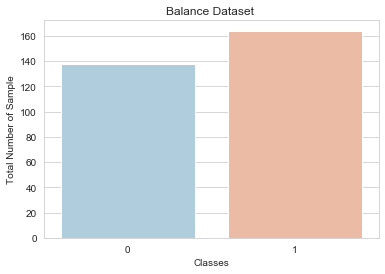

In [11]:
# Target outout class

sns.set_style('whitegrid')
fig= sns.countplot(x= df['output'],data=df,palette='RdBu_r').get_figure()
plt.title('Balance Dataset ')
plt.xlabel('Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_org_heart.pdf')

In [12]:
# Distribution of target class
target_count = df['output'].value_counts()
target_count

1    164
0    138
Name: output, dtype: int64

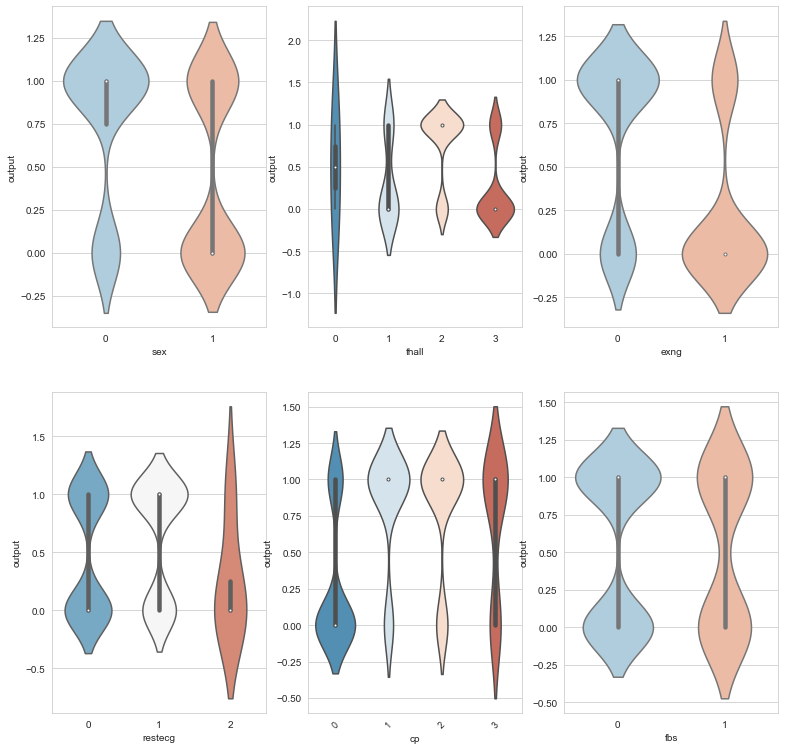

In [13]:
#Violin plot

plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df, palette='RdBu_r')
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df, palette='RdBu_r')
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = df, palette='RdBu_r')

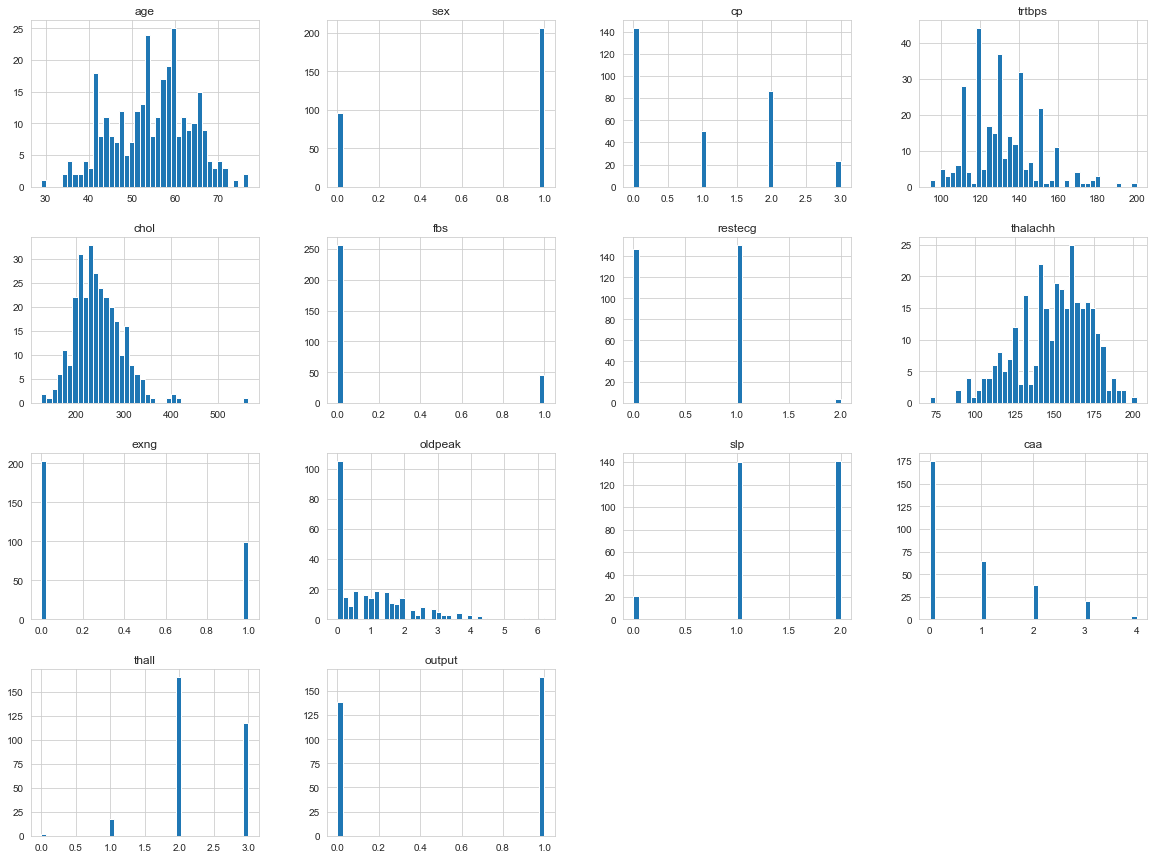

In [14]:
# Histogram Plots
pl = df.hist(bins=40, figsize=(20,15))

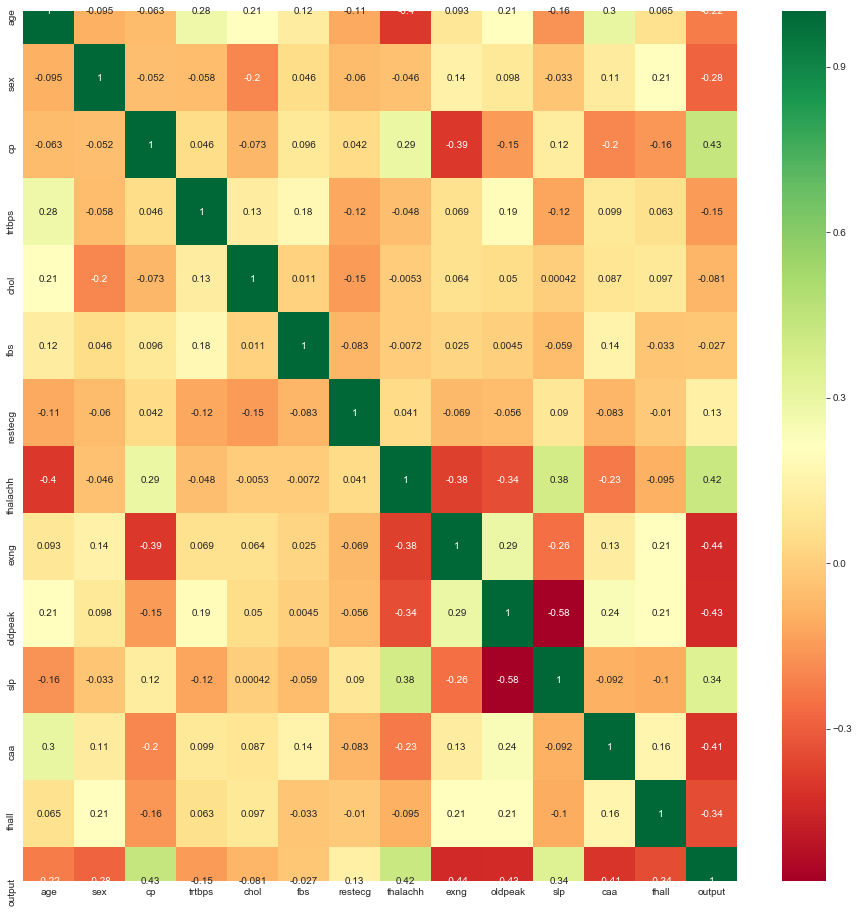

In [15]:
#correlations and ploting a heatmap

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

### Balanced dataset

In [16]:
#Checking the distributation

print(f'Distribution before imbalancing') 

target_count=df['output'].value_counts()
print(target_count)

imbalance_target=(target_count[1] /(target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

imbalance_target=(target_count[0] / (target_count[0] + target_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

Distribution before imbalancing
1    164
0    138
Name: output, dtype: int64
Balanced Percentage : 54.3046357615894 %
Balanced Percentage : 45.6953642384106 %


In [17]:
y_org = df['output']
x_org = df.drop(['output'],axis=1)

### New Imbalance

In [18]:
# Low Imbalance (65%)

x_low, y_low = make_imbalance(x_org, y_org, sampling_strategy = {0: 88 , 1: 164}, random_state = 42)


print(f'Distribution after low imbalancing') 

low_target_count= y_low.value_counts()
print(low_target_count)

low_imbalance_target=(low_target_count[1] /(low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

low_imbalance_target=(low_target_count[0] / (low_target_count[0] + low_target_count[1])) * 100
print(f'Imbalance Percentage : {low_imbalance_target} %')

Distribution after low imbalancing
1    164
0     88
Name: output, dtype: int64
Imbalance Percentage : 65.07936507936508 %
Imbalance Percentage : 34.92063492063492 %


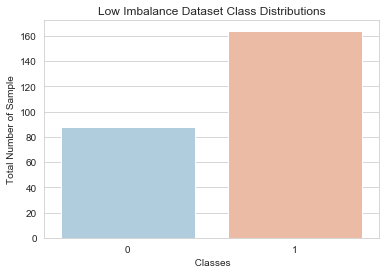

In [19]:
# Saving the fig

sns.set_style('whitegrid')
fig = sns.countplot(x = y_low,data=df,palette='RdBu_r').get_figure()
plt.title('Low Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()
fig.savefig('histogram_low_heart.pdf')

In [20]:
# Medium Imbalance (75%)

x_medium, y_medium = make_imbalance(x_org, y_org, sampling_strategy = {0: 54 , 1: 164}, random_state = 42)


print(f'Distribution after medium imbalancing') 

medium_target_count= y_medium.value_counts()
print(medium_target_count)

medium_imbalance_target=(medium_target_count[1] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


medium_imbalance_target=(medium_target_count[0] /(medium_target_count[0] + medium_target_count[1])) * 100
print(f'Medium Imbalance Percentage : {medium_imbalance_target} %')


Distribution after medium imbalancing
1    164
0     54
Name: output, dtype: int64
Medium Imbalance Percentage : 75.22935779816514 %
Medium Imbalance Percentage : 24.770642201834864 %


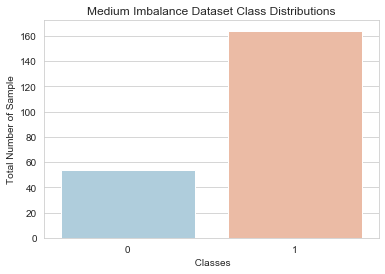

In [21]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_medium,data=df,palette='RdBu_r').get_figure()
plt.title('Medium Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_medium_heart.pdf')

In [22]:
# High Imbalance (90%)

x_high, y_high = make_imbalance(x_org, y_org, sampling_strategy = {0: 18 , 1: 164}, random_state = 42)


print(f'Distribution after high imbalancing') 

high_target_count= y_high.value_counts()
print(high_target_count)

high_imbalance_target=(high_target_count[1] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')

high_imbalance_target=(high_target_count[0] /(high_target_count[0] + high_target_count[1])) * 100
print(f'High Imbalance Percentage : {high_imbalance_target} %')


Distribution after high imbalancing
1    164
0     18
Name: output, dtype: int64
High Imbalance Percentage : 90.10989010989012 %
High Imbalance Percentage : 9.89010989010989 %


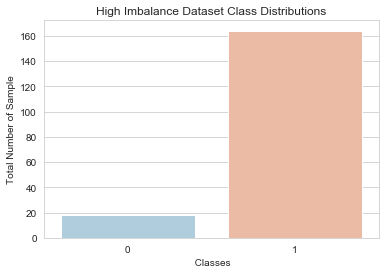

In [23]:
#Saving figure

sns.set_style('whitegrid')
fig = sns.countplot(x = y_high,data=df,palette='RdBu_r').get_figure()
plt.title('High Imbalance Dataset Class Distributions')
plt.xlabel(' Classes')
plt.ylabel('Total Number of Sample')
plt.show()

fig.savefig('histogram_high_heart.pdf')